<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/5_Optimal_Skills.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# What is the most optimal skill to learn for Data Analysts?

#### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

#### Original Exploration

[15_Matplotlib_Scatter_Plots.ipynb](../2_Advanced/15_Matplotlib_Scatter_Plots.ipynb)  
[16_Matplotlib_Advanced_Customization.ipynb](../2_Advanced/16_Matplotlib_Advanced_Customization.ipynb)

## Import Libraries and Data

Import the libraries, data and change the `job_posted_date` to a datetime type.

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


## Clean Data

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame `df_DA_US`. Drop NaN values from the 'salary_year_avg' column. Then it uses the `explode` method on the `job_skills` column to create a new row in a new DataFrame (`df_DA_US_exploded`) for each skill associated with a job. Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` columns.

In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US = df_DA_US.dropna(subset='job_skills')

df_DA_US_exploded = df_DA_US.explode(column='job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Calculate Percent of Job Postings that Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [26]:
df_DA_US_percent = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_US_percent = df_DA_US_percent.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_US_percent['skill_percent'] = df_DA_US_percent['skill_count'].mul(100/len(df_DA_US))

df_DA_US_percent

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,64.839710
excel,1808,84392.0,46.742503
python,1431,97500.0,36.995863
tableau,1364,92875.0,35.263702
sas,926,90000.0,23.940021
...,...,...,...
couchbase,1,160515.0,0.025853
chainer,1,100000.0,0.025853
chef,1,85000.0,0.025853


## Median Salary vs Percent Skill Demand

Filters for Data Analyst skills that exceed a certain percentage (`skill_limit`).

In [27]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_US_percent[df_DA_US_percent['skill_percent'] > skill_limit]

Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

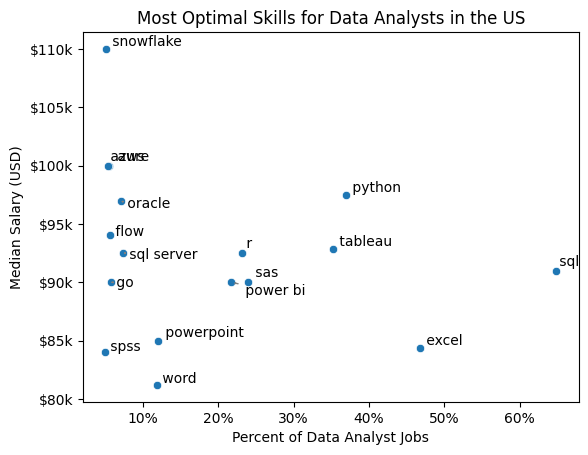

In [39]:
from adjustText import adjust_text

sns.scatterplot(data=df_DA_skills_high_demand, x='skill_percent', y='median_salary')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}k'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.ylabel('Median Salary (USD)')
plt.xlabel('Percent of Data Analyst Jobs')
plt.title('Most Optimal Skills for Data Analysts in the US')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()
